# K Nearest Neighbor

Going to implement KNN algorithm using numpy and pandas

concept of knn, a sample is classified by its nearest neighbour
Let take an example with two classes and two dimensional feature vector 

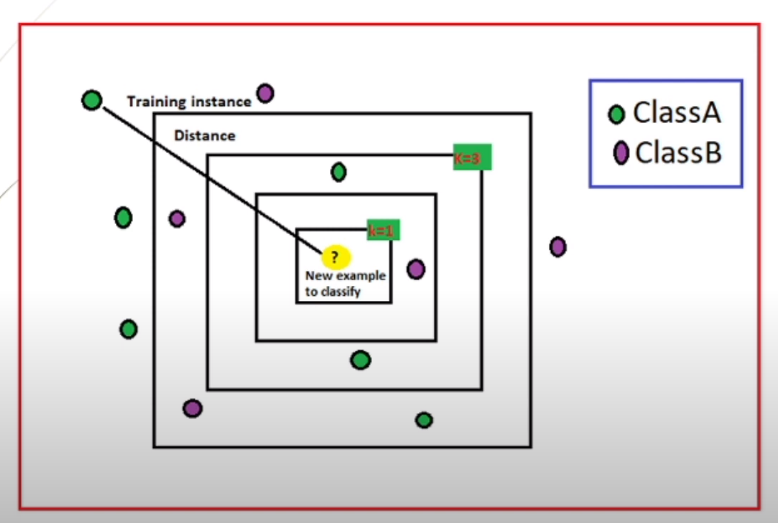

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='fig.png')

Here we have two class green and purple. For new sample yellow we calculate the distance with each of  other 
training smaples. Now lets look at the nearest neighbour for the first case we have took 1 nearest neighbour
so, we predict the new label based on most common class labels. Here  1 nearest sample is purple color so  
new sample also belongs to purple class but when k = 3 i.e when we took 3 nearest neighbour we can see there
are two green label and one purple label so we can label yellow to the green class.

## we also know that in order to calculate the distances we used eudlecian distance

How does KNN work?
We usually use Euclidean distance to calculate the nearest neighbor. If we have two points (x, y) and (a, b). The formula for Euclidean distance (d) will be
d = sqrt((x-a)²+(y-b)²)

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#train test split
import random
list_of_index = [i for i in range( len(df))]

### Train test split function

In [7]:
def train_test_split(df,seed_value,k):
    random.seed(seed_value)
    test_index = random.choices(population=list_of_index,k=k)
    test_data = df.loc[test_index]
    train_data = df.drop(index=test_index)
    X_train = train_data.iloc[:,:-1].values
    X_test = test_data.iloc[:,:-1].values
    y_train = train_data['Target'].values
    y_test = test_data['Target'].values
    return X_train,X_test,y_train,y_test

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df,0,20)

KNN Algorithm

In [9]:
def eudlecian_distance(x1,x2):
#     print('x=',x1,'y=',x2)
#     print(np.sqrt(np.sum((x1-x2)**2)))
    return np.sqrt(np.sum((x1-x2)**2))

In [10]:
from collections import Counter

In [11]:
def predict(x_test,k=3):
    #calculating distance
    distances = [eudlecian_distance(x_test,x_train) for x_train in X_train]
    #know lets take the k nearest sample
    order_asc_distance = np.argsort(distances) #sorting the distance in asc order
    print(order_asc_distance[:k])
    finding_target = [y_train[i] for i in order_asc_distance[:k] ]
    print(finding_target)
    #majority neighbour for this we will use counter module from collection
    most_near_classes = Counter(finding_target).most_common(1)
    print(most_near_classes)
    return most_near_classes[0][0]

### Testing the module

In [12]:
X_test,y_test

(array([[6.2, 2.8, 4.8, 1.8],
        [5.7, 2.5, 5. , 2. ],
        [6.1, 2.9, 4.7, 1.4],
        [4.4, 3. , 1.3, 0.2],
        [6.8, 2.8, 4.8, 1.4],
        [5. , 2. , 3.5, 1. ],
        [7.7, 3.8, 6.7, 2.2],
        [4.8, 3. , 1.4, 0.3],
        [6.1, 2.8, 4. , 1.3],
        [6.3, 2.3, 4.4, 1.3],
        [6.3, 3.4, 5.6, 2.4],
        [6.6, 3. , 4.4, 1.4],
        [4.4, 3.2, 1.3, 0.2],
        [5.7, 2.5, 5. , 2. ],
        [5.8, 2.6, 4. , 1.2],
        [4.9, 3.6, 1.4, 0.1],
        [6.3, 3.4, 5.6, 2.4],
        [6.5, 3. , 5.2, 2. ],
        [5.6, 2.8, 4.9, 2. ],
        [7.7, 3. , 6.1, 2.3]]),
 array([2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2],
       dtype=int64))

Choosing the right value of K is called parameter tuning and it’s necessary for better results. By choosing the value of K we square root the total number of data points available in the dataset.
a. K = sqrt (total number of data points).
b. Odd value of K is always selected to avoid confusion between 2 classes.

In [21]:
# in our case
import math
math.floor(np.sqrt(len(df)))
# take odd number 
k = 3

In [14]:
pre_list = []
for i in X_test[:]:
    dis = predict(i,k=3) 
    pre_list.append(dis) 

[109 112 121]
[2, 2, 2]
[(2, 3)]
[125  90 102]
[2, 2, 2]
[(2, 3)]
[81 66 69]
[1, 1, 1]
[(1, 3)]
[ 8 13  3]
[0, 0, 0]
[(0, 3)]
[54 77 48]
[1, 1, 1]
[(1, 3)]
[82 53 72]
[1, 1, 1]
[(1, 3)]
[116  94  98]
[2, 2, 2]
[(2, 3)]
[ 1 12 34]
[0, 0, 0]
[(0, 3)]
[86 73 56]
[1, 1, 1]
[(1, 3)]
[62 65 57]
[1, 1, 1]
[(1, 3)]
[130 103  89]
[2, 2, 2]
[(2, 3)]
[59 54 67]
[1, 1, 1]
[(1, 3)]
[43  3  2]
[0, 0, 0]
[(0, 3)]
[125  90 102]
[2, 2, 2]
[(2, 3)]
[73 61 88]
[1, 1, 1]
[(1, 3)]
[ 4  0 38]
[0, 0, 0]
[(0, 3)]
[130 103  89]
[2, 2, 2]
[(2, 3)]
[ 99 100 104]
[2, 2, 2]
[(2, 3)]
[125  90 131]
[2, 2, 2]
[(2, 3)]
[115  94  91]
[2, 2, 2]
[(2, 3)]


In [207]:
pre_list

[2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2]

### Lets check the accuracy 

In [29]:
list_sum =[]
for i in range(len(pre_list)):
    if pre_list[i] == y_test[i]:
        list_sum.append(np.sum(pre_list[i] == y_test[i]))

In [35]:
np.sum(list_sum)/len(y_test) # shows that all of our prediction are correct

1.0

### Some of the other applications of KNN in finance are mentioned below:
* Forecasting stock market: Predict the price of a stock, on the basis of company performance measures and economic data.
* Currency exchange rate.
* Bank bankruptcies.
* Understanding and managing financial risk.
* Trading futures.
* Credit rating.
* Loan management.